# 전처리작업

## 데이터 가공

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# # 네이버 나눔 폰트 설치, 런타임재시작 후 plt.rc('font', family='NanumBarunGothic')
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

# plt.style.use('seaborn-v0_8_pastel')
# sns.set_palette('Set3')

In [92]:
df1 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/주가지수.csv')       # 주가지수(코스피, 코스닥)
df2 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/기준금리.csv')       # 한국은행 기준금리
df3 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/달러환율.csv')       # 환율
df4 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/주택매매가격.csv')   # 주택매매가격 
df5 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/지가변동률.csv')     # 지가변동률 
df6 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/외국인보유.csv')     # 외국인보유지분
df7 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/소비자물가지수_월별.csv') # 소비자 물가지수 
df8 = pd.read_csv('/content/gdrive/MyDrive/프로젝트2/저축률,투자률 분기.csv')  # 저축률,투자율 

In [93]:
stocks = copy.deepcopy(df1)
gold = copy.deepcopy(df2)
dolor = copy.deepcopy(df3)
price = copy.deepcopy(df4)
earth = copy.deepcopy(df5)
foreigner = copy.deepcopy(df6)
thing = copy.deepcopy(df7)
invest = copy.deepcopy(df8)

In [94]:
stocks = stocks.dropna(axis=1).iloc[:,4:].T    # 코스피, 코스닥 일별 (밑에 월별도 만듬)
stocks.columns = ['코스피', '코스닥']          

stocks.index = pd.to_datetime(stocks.index)    # 인덱스 타입 DateIndex로 변경

stocks.코스피 = stocks.코스피.replace(',','', regex = True).astype('float') # ',' 제거하고 수치형으로 변경(str+numeric data에 str.replace 할 경우 Nan값 생성)
stocks.코스닥 = stocks.코스닥.replace(',','', regex = True).astype('float') #  str을 지우고, regex =True로 하면 일부 ','도 치환

In [95]:
stocks_month = stocks.resample('M').mean().round(2)           # 'M' 월 단위로 데이터 묶어서 평균냄 / 주식 월단위 데이터
stocks_month.index = stocks_month.index.strftime("%Y-%m")  # strftime으로 인덱스 표시형식 변경
stocks_month.index = pd.to_datetime(stocks_month.index)

In [96]:
gold = gold.dropna(axis=1).T  # 기준금리 월단위
gold.columns = ['기준금리'] 
gold = gold.iloc[4:]          
gold_month = copy.deepcopy(gold)
gold_month.index = pd.to_datetime(gold_month.index)

gold.index = pd.to_datetime(gold.index).strftime("%Y-%m-%d") # 데이터형식 변경
gold.index = gold.index.astype('datetime64[ns]')             # 데이터타입 변경
gold.drop(gold.index[gold.index < '2003-01-01'], inplace = True) # 데이터 제거
gold_skewed = 1/gold


In [97]:
dolor = dolor.loc[:,'2003/01/02':].T  # 달러
dolor.columns = ['달러']
dolor.index = pd.to_datetime(dolor.index)
dolor = dolor.replace(',','',regex =True).astype(float)
# dolor = np.log1p(dolor)

In [98]:
dolor_month = dolor.resample('M').mean().round(2) # 월단위 달러
dolor_month.index = dolor_month.index.strftime("%Y-%m")
dolor_month.index = pd.to_datetime(dolor_month.index)

In [99]:
foreigner = foreigner.iloc[:,5:]                # 외국인 주식 거래대금 월단위
foreigner = foreigner.replace(',','',regex=True).astype(int)  # 
foreigner.iloc[0] =foreigner.iloc[2:5].sum() - foreigner.iloc[0:2].sum()
foreigner = foreigner.T
foreigner = foreigner.drop([1,2,3,4], axis=1)
foreigner.index = pd.to_datetime(foreigner.index)
foreigner.columns = ['거래대금(외)']
foreigner_skewed = 1/np.cumsum(foreigner)
foreigner = np.cumsum(foreigner)

In [100]:
price = price.iloc[:,5:].T # 주택판매가격 2003/11 월단위
price.columns = ['주택판매가격']
price.index = pd.to_datetime(price.index)

In [101]:
earth = earth.iloc[:,4:].T # 지가변동률 2005/01 월단위
earth.columns = ['지가변동률']
earth.index = pd.to_datetime(earth.index)
earth_skewed = 1/earth

In [102]:
thing = thing.iloc[:,5:].T  # 소비자 물가지수 2004/01 월단위
thing.columns = ['소비자물가']
thing.index = pd.to_datetime(thing.index)

In [103]:
invest = invest.iloc[:,4:].T      # 저축, 투자 2016년 2분기 ~ 분기별
invest.columns = ['저축률', '투자율']

## 데이터 합치기

In [104]:
all = pd.concat([stocks,gold],axis=1) # 코스피, 코스닥  + 기준금리 
all.기준금리 = all.기준금리.ffill()
all.dropna(inplace =True)

In [105]:
all = pd.concat([all,dolor], axis= 1 ) # 환율 추가
all.dropna(axis=0, inplace=True)

In [106]:
all = pd.concat([all,foreigner],axis=1) # 달러 2003년 자료 없어서 2003년 드롭
all = all.ffill()
all.dropna(axis=0, inplace=True)

In [107]:
month = pd.concat([stocks_month,gold_month,dolor_month, foreigner, price, earth, thing], axis = 1) # 월별데이터
month.dropna(how='any', axis=0, inplace = True)

## 시각화 샘플

### 일단위
stocks, dolor, gold, foreigner
### 월단위
stock_month, gold_month,dolor_month, foreigner, price, earth, thing
### 분기
invest

### 합성데이터
- all = 코스피, 코스닥, 기준금리, 달러, 거래대금
- month = 월단위 데이터들

In [163]:
from sklearn.model_selection import train_test_split

x_all = all.drop('코스피',axis=1)
y_all = all['코스피']

x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x_all, y_all, test_size = 0.2, random_state = 42)

x_train_all.shape, y_train_all.shape, x_test_all.shape, y_test_all.shape

((3791, 4), (3791,), (948, 4), (948,))

In [164]:
x_month = month.drop('코스피',axis=1)
y_month = month['코스피']

x_train_mon, x_test_mon, y_train_mon, y_test_mon = train_test_split(x_month, y_month, test_size = 0.2, random_state = 42)

x_train_mon.shape, y_train_mon.shape, x_test_mon.shape, y_test_mon.shape

((168, 7), (168,), (43, 7), (43,))

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_all= scaler.fit_transform(x_train_all)
x_test_all = scaler.transform(x_test_all)

In [186]:
x_train_mon = scaler.fit_transform(x_train_mon)
x_test_mon = scaler.transform(x_test_mon)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


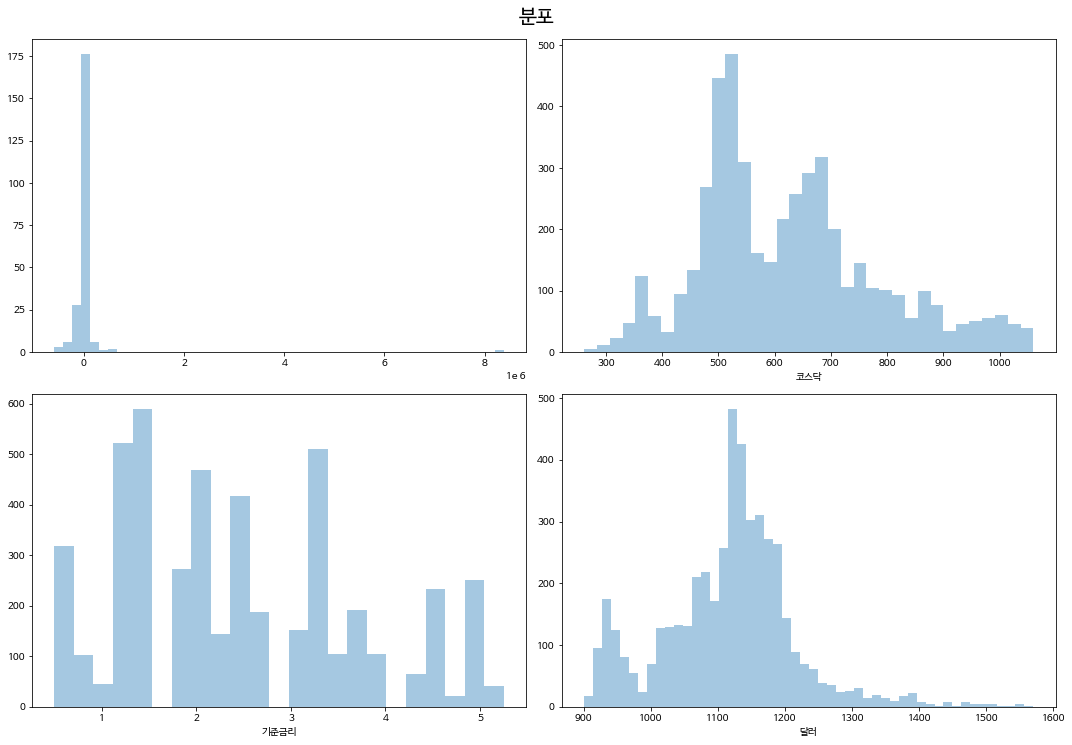

In [158]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))
sns.distplot(foreigner_skewed, ax = ax[0, 0], kde = False) # foreigner_skewed, all['거래대금(외)']
sns.distplot(all['코스닥'], ax = ax[0, 1], kde = False)
sns.distplot(all['기준금리'], ax = ax[1, 0], kde = False) # gold_skewed, all['기준금리']
sns.distplot(all['달러'], ax = ax[1, 1], kde = False)

# ax[0, 0].set_title("코스피")      # 각 그래프 타이틀
# ax[0, 1].set_title("코스닥")
# ax[0, 2].set_title("기준금리")
# ax[1, 0].set_title("달러")
# ax[1, 1].set_title("거래대금(외)")
fig.suptitle("분포", y = 1.03, fontsize=20)         # 그래프 전체 타이틀
fig.tight_layout()           # 그래프 레이아웃 조정

# plt.subplots_adjust(hspace=.2, # 서브플롯의 높이(실수)
#                     wspace=.1, # 너비(실수)
#                     top=1,     # 높이(정수)
#                     right=1)   # 너비(정수)

# left_distribution: X^3
# mild_left: X^2
# mild_right: sqrt(X)
# right: ln(X)
# servere right: 1/X
plt.show();

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


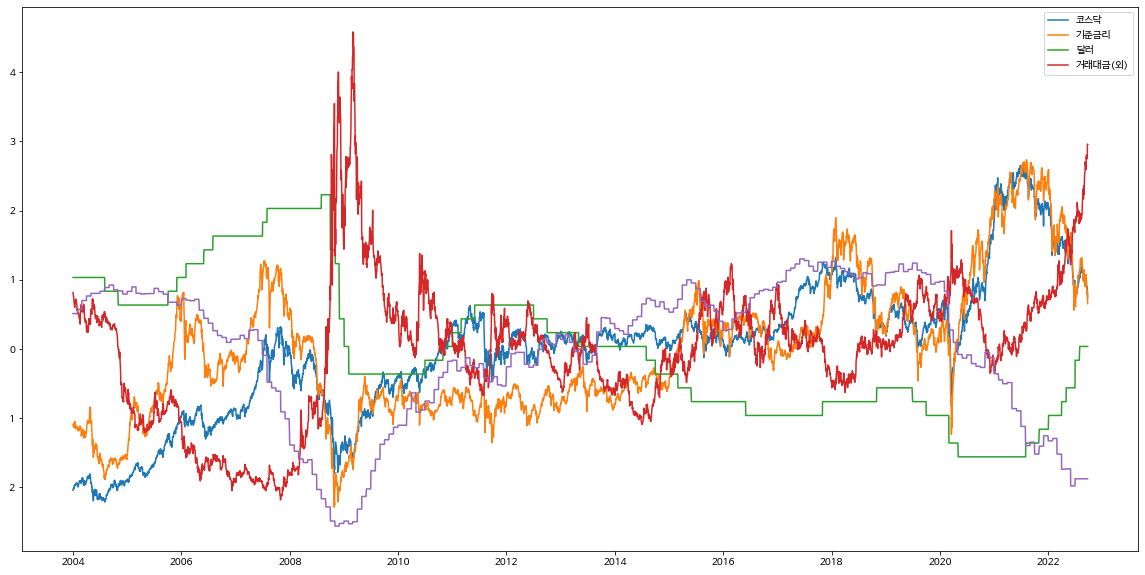

In [178]:
all_graph = copy.deepcopy(all)
all_graph[['코스피','코스닥', '기준금리', '달러', '거래대금(외)']] = scaler.fit_transform(all_graph)
plt.rc('font', family='NanumBarunGothic')  # 한글 폰트
plt.figure(figsize = (20,10))
plt.plot(all_graph['코스피'])
plt.plot(all_graph['코스닥'])
plt.plot(all_graph['기준금리'])
plt.plot(all_graph['달러'])
plt.plot(all_graph['거래대금(외)'])
plt.legend(['코스닥', '기준금리', '달러', '거래대금(외)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


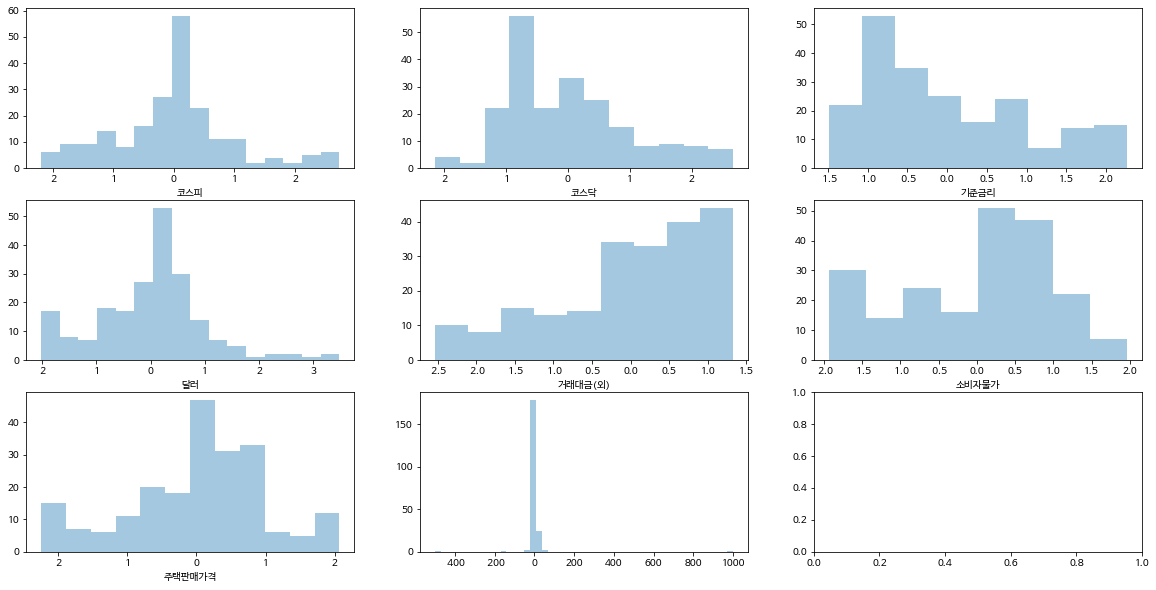

In [182]:
fig, ax  = plt.subplots(nrows = 3, ncols =3, figsize=(20,10))

sns.distplot(month['코스피'], kde=False, ax= ax[0,0])
sns.distplot(month['코스닥'], kde=False, ax= ax[0,1])
sns.distplot(month['기준금리'], kde=False, ax= ax[0,2])
sns.distplot(month['달러'], kde=False, ax= ax[1,0])
sns.distplot(month['거래대금(외)'], kde=False, ax= ax[1,1])
sns.distplot(month['소비자물가'], kde=False, ax= ax[1,2])
sns.distplot(month['주택판매가격'], kde=False, ax= ax[2,0])
sns.distplot(earth_skewed, kde=False, ax= ax[2,1])

In [179]:
month_graph = copy.deepcopy(month)
month_graph[['코스피', '코스닥', '기준금리', '달러', '거래대금(외)', '주택판매가격', '지가변동률', '소비자물가']] = scaler.fit_transform(month_graph)

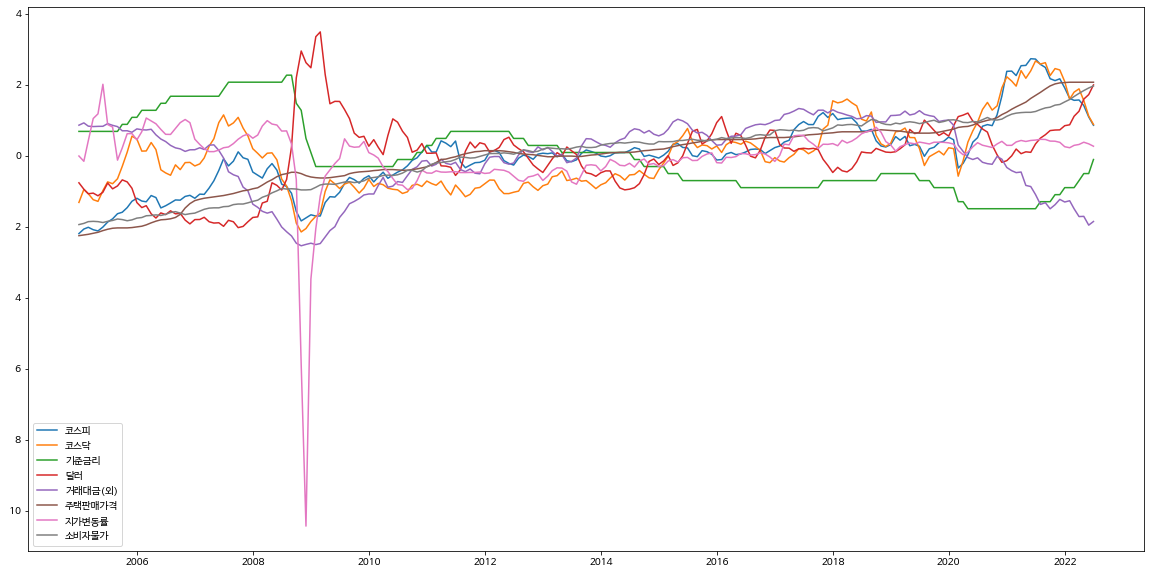

In [181]:
plt.figure(figsize=(20,10))
plt.plot(month_graph)
plt.legend(['코스피', '코스닥', '기준금리', '달러', '거래대금(외)', '주택판매가격', '지가변동률', '소비자물가'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


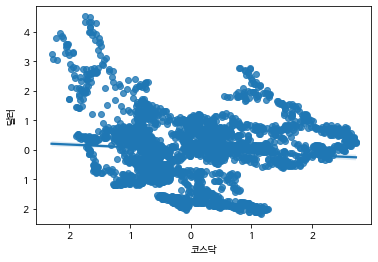

In [171]:
sns.regplot(data = x_train_all, x='코스닥', y='달러')

# 가설

1. 주식은 굉장히 복합적인 요소에 따라서 오르고 내린다. 실제적으로 다양한 지표들이 주식과 연관성이 있는지, 있다면 언제 주식을 사는게 좋을지 알아보자



내가 세운 가설이 문제 해결에 의미가 있는지?

해당 특성을 타겟으로 설정한 이유

데이터리키지가 있었는지? 있었다면 어떻게 방지했는지?

기준모델설정

검증결과와 테스트 결과의 일반화 

## 주식과의 관계

## 1. 물가
- 물가가 안정적일 때 사람들은 미래를 설계하며 안정적인 투자활동을 하고, 주식도 상승하게된다.
- 물가가 높을 때 사람들은 불안에 떨며 지갑을 닫고 주식을 팔게 되고 정부는 높은 물가를 잡기 위해 금리를 올려서 결과적으로 기업의 이자부담이 늘어 주가가 떨어지게 된다.(현재 상황)

## 2.환율
상식    
- 환율이 오르면 수출로 벌어들이는 돈이 많아지고 기업의 성과가 좋아져 주식이 오른다.  

사실
- 환율 하락 : 주식상승(기업의 수출증가, 외국인 유출), 수출을 많이해서 달러공급이 높으면, 달러의 가격이 하락한다.     
- 환율 상승 : 주식하락(기업의 수출감소, 외국인 유입), 수출이 적으면 달러공급이 적어져서 달러의 가치가 상승한다.      
- 환율이 비쌀 때 한국에 투자를 하던 외국인들이 환율이 저렴해지면 주식을 팔고 나감( 달러를 비싸게 팔고, 싸게 사서 나감)   


 

## 3. 금리
- 금리가 하락하면 사람들이 주식이나 펀드로 눈을 돌림, 기업의 이자부담이 줄어 투자활동 활발 -> 주식상승
- 금리가 상승하면 사람들이 채권이나 저축을 하게되고, 기업의 이자부담이 늘어 소극적 투자활동을 하게됨 -> 주식하락

## 4. 부동산 
- 유동성, 수요, 공급에 따라 오르고 내림
- 주식시장의 상승,하락과 상관 없이 지속적으로 상승
- 현금의 유동성이 클 때 주식,부동산 모두 상승한다.
- 이유 : 주식을 팔고 집을 사는 경우는 있지만, 집을 팔고 주식을 사는 경우는 드물다.

## 5. 외국인 보유비중
- 한국 주식시장이 좋지 않을 때 외국인 비중이 어떤가?

## 6. 경제상황에 따라 저축률과 투자율의 큰 차이가 있는지?



- 물가, 금리, 환율, 부동산이 나스닥과 코스피 어디에 더 영향을 미칠까?(미국기준금리, 나스닥, 다우)

- 삼성전자와 코스피의 추세가 비례하는가?   
코스피<=> 코스닥 or 나스닥<=>다우지수


- 종목별 주식의 계절성이 있는가? 연말, 여름주, 태풍주, 주가의 경향성(업종에 따른 추세), 감자, 유증, 무증, 거래정지

- 정당별 경제상황 주식,  부동산 어느정당이 더 잘했나?

- 투자자의 위험회피성향 -> 1종오류가 중요한지 2종오류가 중요한지-> 회귀니까 mse mae 등등

- 회귀문제 : 학습이 데이터가 대칭인지 비대칭인지 확인
- 인사이트 : 0.4점 넘으면 알람이 오게끔 하라

- 주가가 임계치를 기준으로 오를지, 내릴지
종가를 기준으로 오를지 내릴지

In [184]:
print("일단위")
print(all.columns)
print(all.corr().코스피.sort_values(ascending=False))

일단위
Index(['코스피', '코스닥', '기준금리', '달러', '거래대금(외)'], dtype='object')
코스피        1.000000
코스닥        0.801744
달러         0.133790
거래대금(외)   -0.043168
기준금리      -0.650434
Name: 코스피, dtype: float64


In [185]:
print("월단위")
print(month.columns)
print(month.corr().코스피.sort_values(ascending=False))

월단위
Index(['코스피', '코스닥', '기준금리', '달러', '거래대금(외)', '주택판매가격', '지가변동률', '소비자물가'], dtype='object')
코스피        1.000000
주택판매가격     0.884412
소비자물가      0.850007
코스닥        0.772026
달러         0.189808
지가변동률      0.179784
거래대금(외)    0.067520
기준금리      -0.643689
Name: 코스피, dtype: float64
